<a href="https://colab.research.google.com/github/beatriz-sait07/python/blob/main/KNN_linguagem_bia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taynan

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
#from matplotlib import image
from PIL import Image
import pandas as pd

In [3]:
#caminho = '/content/drive/MyDrive/Projetinho/SignLanguage/American Sign Language Digits Dataset'
caminho = '/content/drive/MyDrive/American Sign Language Digits Dataset'
df = []
for i in range(10):
  caminho_i = os.path.join(caminho, str(i), 'Input Images - Sign {}'.format(i))
  for img_path in os.listdir(caminho_i):
      img = Image.open(os.path.join(caminho_i, img_path))
      df.append({
          "label" : i,
          "imagem": img
      })

In [4]:
DF = pd.DataFrame(df)
DF

,label,imagem
0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
4995,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4996,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4997,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4998,9,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [5]:
images = np.array(DF['imagem'].tolist())

<ipython-input-5-750d71083f58>:1: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  images = np.array(DF['imagem'].tolist())
<ipython-input-5-750d71083f58>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(DF['imagem'].tolist())


In [6]:
images

array([<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7F944F27FD30>,
       <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7F944F31D5D0>,
       <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7F944F31D630>,
       ...,
       <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7F944DD26E30>,
       <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7F944DD26E90>,
       <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x400 at 0x7F944DD26EF0>],
      dtype=object)

In [7]:
labels = np.array(DF['label'])

In [8]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [9]:
print(images.dtype)

object


In [10]:
redimens = []
for image in images:
  redimen = image.resize((64,64))
  redimens.append(np.array(redimen))

In [11]:
images = np.array(redimens)

In [12]:
images_norm = images / 255

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(images_norm, labels)

In [15]:
X_train = X_train.reshape(-1, 1)

In [16]:
y_train = np.repeat(y_train, 46080000 // 3750) #aumentando a quantidade de amostras no y_train

In [19]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [20]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
teste1 = "/content/drive/MyDrive/Colab Notebooks/projeto_ferias/testes/imagem02.jpeg"

In [47]:
test_img1 = Image.open(os.path.join(teste1))

In [48]:
red_tam_test1 = test_img1.resize((64, 64))

In [49]:
norm_test1 = np.array(red_tam_test1) / 255

In [50]:
red_tam_test1 = np.array(red_tam_test1)
red_tam_test1 = red_tam_test1.reshape(-1, 3)

In [51]:
prev1 = knn_classifier.predict(np.array(red_tam_test1).reshape(-1, 1))

In [52]:
print("previsao Label:", prev1[0])

previsao Label: 5


In [53]:
from matplotlib import pyplot as plt

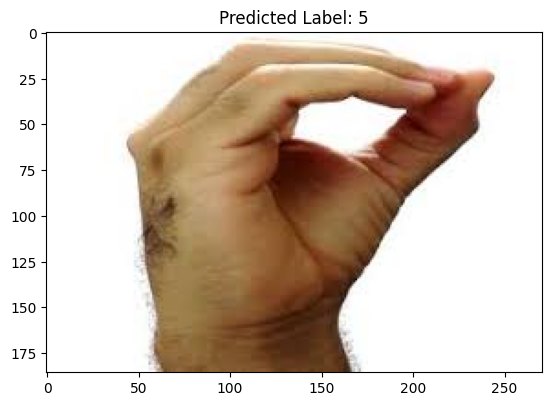

In [54]:
plt.imshow(test_img1)
plt.title(f"Predicted Label: {prev1[0]}")
plt.show()